# Centroid Measurement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from astropy.io import fits
%matplotlib widget

The following script uploads the first science corrected frame

In [2]:
# Carico la lista dei file science
science_list = np.genfromtxt('./group10_WASP-135_20190803/science/science.list', dtype=str)
# Come per l'analisi fatta nella lezione precedente, carico solo i primi 30 frames.
science_test_list = science_list[:30]
# In questa variabile immagazzino il nome del primo corrected science frame.
science_frame_name = './group10_WASP-135_20190803/correct/' + science_test_list[0][:-5] + '_corr.p'
# Carico il file corrispondente a questo nome
science_corrected = pickle.load(open(science_frame_name, 'rb'))

### Identification of the target and reference stars

We now open and display a scientific frame and we identify the target star (the one with the transiting planet) and the reference stars (used to do differential photometry). By changing the $\texttt{vmin}$ and $\texttt{vmax}$ we can highlight fainter stars.

vmin:  1067.9   vmax: 110239.3


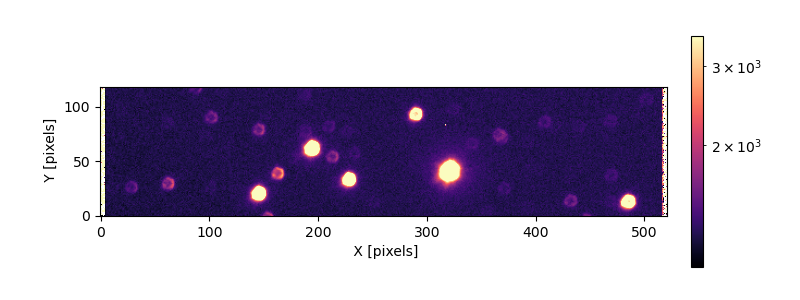

In [3]:
import matplotlib.colors as colors

vmin = np.amin(science_corrected[:,100:400])
vmax = np.amax(science_corrected[:,100:400])
print('vmin:  {0:.1f}   vmax: {1:.1f}'.format(vmin, vmax))

#Abbassiamo il vmax altrimenti non si vede molto
vmax=3500

fig, ax = plt.subplots(1, figsize=(8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax), origin='lower')
plt.colorbar(im1, ax=ax, fraction=0.046, pad=0.04)
plt.xlabel(' X [pixels]')
plt.ylabel(' Y [pixels]')
plt.show()


From this frame we can get an approximate location of the star (in pixels). In this case we got:

- x_target = 228
- y_target = 33

- x_reference_01 = 146
- y_reference_01 = 21

- x_reference_02 = 194
- y_reference_02 = 62

- x_reference_03 = 290
- y_reference_03 = 93

- x_reference_04 = 322
- y_reference_04 = 40

We don't need to be extremely precise at this stage, we will refine the coordinates afterwards. In the next cell there is a function that creates a plot, we use a function since we will use this plot a lot and we need to be able to call it often.

In [4]:
def make_circle_around_star(x_pos, y_pos, label='', color='w'):
    """
    This function creates a circle around the selected target in the science frame.

    Parameters:
    - x_pos: x coordinate of the target.
    - y_pos: y coordinate of the target.

    It does not return a variable but it produces a plot instead.
    """
    from matplotlib.patches import Circle # Serve per disegnare cerchi su un grafico

    n, radii = 50, [9, 15] #Numero di punti con cui approssimare la circonferenze e due raggi
    theta = np.linspace(0, 2*np.pi, n, endpoint=True) # Genera n valori di theta tra 0 e 2pi.
    xs = np.outer(radii, np.cos(theta)) # crea coordinata x per ogni raggio e theta
    ys = np.outer(radii, np.sin(theta)) # stessa cosa per la coordinata y

    #Il cerchio che abbiamo è in realtà un anello dato da un cerchio interno e uno esterno e noi coloriamo
    #la parte fra i due cerchi.

    # in order to have a closed area, the circles should be traversed in opposite directions
    xs[1,:] = xs[1,::-1] # L'ordine dei punti è importante per il corretto riempimento dell'area
    ys[1,:] = ys[1,::-1] # Deve essere cambiato perché ax.fill() lavora al contrario rispetto a come li abbiamo definiti

    #ax.fill riempie l'area tra i due cerchi
    ax.fill(np.ravel(xs)+x_pos, np.ravel(ys)+y_pos, edgecolor=None, facecolor=color, alpha=0.75, label=label)


With this function we can draw as many circles as we want by simply adding one line of code. We run the following code many times until the position of the circles are centered on the stars.

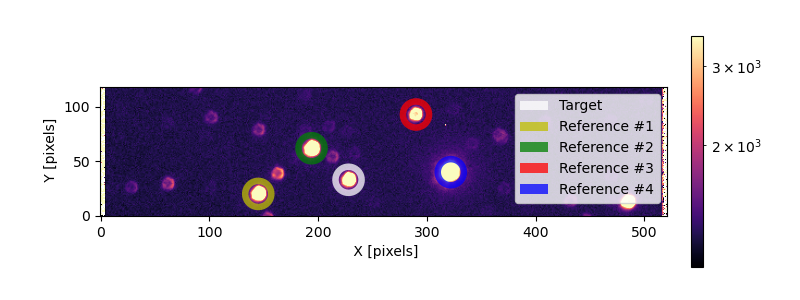

In [14]:
x_target = 228
y_target = 33

x_reference_01 = 145
y_reference_01 = 20

x_reference_02 = 194
y_reference_02 = 62

x_reference_03 = 290
y_reference_03 = 93

x_reference_04 = 322
y_reference_04 = 40

fig, ax = plt.subplots(1, figsize=(8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax), origin='lower')
plt.colorbar(im1, ax=ax, fraction=0.046, pad=0.04)

make_circle_around_star(x_target, y_target, label='Target', color='w')
make_circle_around_star(x_reference_01, y_reference_01, label='Reference #1', color='y')
make_circle_around_star(x_reference_02, y_reference_02, label='Reference #2', color='g')
make_circle_around_star(x_reference_03, y_reference_03, label='Reference #3', color='r')
make_circle_around_star(x_reference_04, y_reference_04, label='Reference #4', color='b')

plt.xlabel(' X [pixels]')
plt.ylabel(' Y [pixels]')
ax.legend()
plt.show()

### Photocenter determination of a star